# Answering Questions about mushrooms


In [53]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

In [3]:
try:
    data = pd.read_csv("/home/faculty/millbr02/pub/mushrooms.csv")
except:
    data = pd.read_csv("mushrooms.csv")

## Mushroom Questions


### 1. difference between cap shapes for e and p

In [4]:
data[data['class'] == 'e'].groupby('cap-shape').size()

cap-shape
b     404
f    1596
k     228
s      32
x    1948
dtype: int64

In [5]:
data[data['class'] == 'p'].groupby('cap-shape').size()

cap-shape
b      48
c       4
f    1556
k     600
x    1708
dtype: int64

## Pivot Table Solution!

In [49]:
# crosstab (index , columns, values)
# index == what to use as the index
# columns what column to use to pivot and give us the labels for the pivoted table
pd.crosstab(data['cap-shape'], data['class'])

class         e     p
cap-shape            
b           404    48
c             0     4
f          1596  1556
k           228   600
s            32     0
x          1948  1708

In [51]:
pd.crosstab(data['class'], data['cap-shape'])

cap-shape    b  c     f    k   s     x
class                                 
e          404  0  1596  228  32  1948
p           48  4  1556  600   0  1708

## multi-level index (groupby) solution

In [7]:
pd.DataFrame(data.groupby(['class', 'cap-shape']).size())

0
class cap-shape      
e     b           404
      f          1596
      k           228
      s            32
      x          1948
p     b            48
      c             4
      f          1556
      k           600
      x          1708

## Graphically


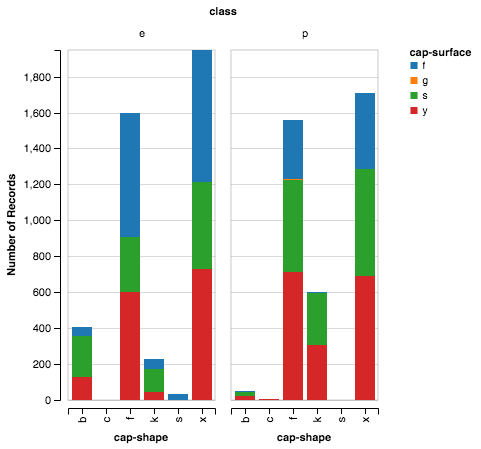

In [8]:

import altair
altair.Chart(data, max_rows=10000).mark_bar().encode(x='cap-shape',color='cap-surface', column='class', y='count(*)')

In pandas we can do something similar, but we have to do the counting work up front before we can make our bar chart.

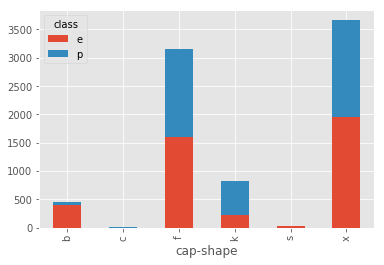

In [54]:
df2 = data[['cap-shape','class']].groupby(['cap-shape','class'])['class'].count().unstack('class').fillna(0)
df2.plot(kind='bar', stacked=True)


Breaking down the data munging - look at the result of the groupby and unstack

`unstack` is a really good function to know as it takes an element from the index and creates columns.

In [44]:
data[['cap-shape','class']].groupby(['cap-shape','class'])['class'].count()

cap-shape  class
b          e         404
           p          48
c          p           4
f          e        1596
           p        1556
k          e         228
           p         600
s          e          32
x          e        1948
           p        1708
Name: class, dtype: int64

In [46]:
data[['cap-shape','class']].groupby(['cap-shape','class'])['class'].count().unstack('class')

class           e       p
cap-shape                
b           404.0    48.0
c             NaN     4.0
f          1596.0  1556.0
k           228.0   600.0
s            32.0     NaN
x          1948.0  1708.0

What happens if we flip the whole thing around?

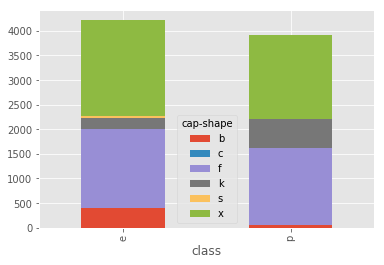

In [55]:
df2 = data[['class', 'cap-shape']].groupby(['class','cap-shape'])['cap-shape'].count().unstack('cap-shape').fillna(0)
df2.plot(kind='bar', stacked=True)

You could recreate the plot made by altair by separating it into two plots (its what altair does with the column parameter)


### 2. population of p by habitat

In [8]:
data[data['class'] == 'p'].groupby(['habitat', 'population']).size()

habitat  population
d        c              36
         s              96
         v             920
         y             216
g        s             136
         v             388
         y             216
l        c              16
         v             576
m        v              36
p        v             792
         y             216
u        s             136
         v             136
dtype: int64

### 3. Are p more likely to have an odor? 

### 4. Distribution of colors in e and p

### 5. What habitat has the highest proportion of p

In [9]:
ph = data[data['class'] == 'p'].groupby('habitat').size()
eh = data.groupby('habitat').size()

In [10]:

ph/eh

habitat
d    0.402795
g    0.344507
l    0.711538
m    0.123288
p    0.881119
u    0.739130
w         NaN
dtype: float64

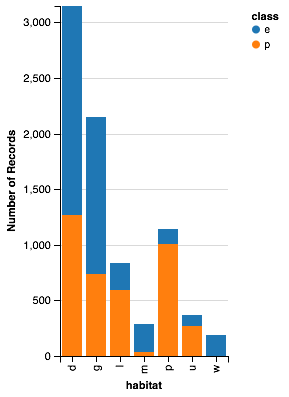

In [11]:
altair.Chart(data, max_rows=10000).mark_bar().encode(x='habitat', color='class', y='count(*)')

Can you replicate this using regular vanilla pandas??

### 6. what is the most common and least common odor?

In [12]:
data.groupby('odor').size().sort_values()

odor
m      36
c     192
p     256
a     400
l     400
s     576
y     576
f    2160
n    3528
dtype: int64

In [13]:
data['odor'].hist()

In [14]:
pd.crosstab(data['odor'], data['class'])

class     e     p
odor             
a       400     0
c         0   192
f         0  2160
l       400     0
m         0    36
n      3408   120
p         0   256
s         0   576
y         0   576